## The diabetes dataset is given.

- The objective is to predict based on diagnostic  measurements whether a patient has diabetes.
---
- Dataset description  

  • Pregnancies: To express the Number of pregnancies

  • Glucose: To express the Glucose level in blood

  • BloodPressure: To express the Blood pressure measurement

  • SkinThickness: To express the thickness of the skin  
  
  • Insulin: To express the Insulin level in blood  
  
  • BMI: To express the Body mass index  
  
  • DiabetesPedigreeFunction: To express the Diabetes percentage  
  
  • Age: To express the age  
  
  • Outcome: To express the final result 1 is YES o is NO  
  
  
*Please note the following:*

*Note: The zeros in the dataset are actually nan values(except target column). Treat zeros as nan and impute them using any suitable methods.*

---
# 1. Import libraries
---

In [225]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

---
#2. Load dataset
---

In [226]:
dia_df = pd.read_csv('/content/diabetes (1).csv')
dia_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [227]:
dia_df.shape

(768, 9)

In [228]:
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [230]:
dia_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

###$Statistical \space data \space analysis$

In [231]:
dia_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [232]:
dia_df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


$Summary \space:$
- The dataset has 768 rows and 9 columns.
- All the features are numeric type and no categorical data is found.
- The target column is 'Outcome', with only two possible values, 0 and 1.
- So that makes a *binary classification task*.




---
#3. Data Cleaning and Pre-processing
---

In [233]:
# Detect Invalid Zeroes
# ========================
#Ignore 'Outcome' as its the target column
#-----------------------------------------------
feat_col = dia_df.columns.drop("Outcome")
#------------------------------------------------
#Count zero values in each feature
#=================================================
zero_feat = (dia_df[feat_col] == 0).sum()
print("Zero Entries Per Feature:\n", zero_feat[zero_feat >= 0])

Zero Entries Per Feature:
 Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


In [234]:
# Step 2: Preprocess the Data
#------------------------------------------------------
# Replace zeros with NaN (except for the Outcome column)
# -------------------------------------------------------

dia_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = dia_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)

In [235]:
# Impute missing values using mean
# -------------------------------------
dia_df.fillna(dia_df.mean(), inplace=True)

In [236]:
zero_feat = (dia_df[feat_col] == 0).sum()
print("Zero Entries Per Feature:\n", zero_feat[zero_feat >= 0])#all the nan values are imputed

Zero Entries Per Feature:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


---
#4. Data Splitting
---

In [250]:
from sklearn.model_selection import train_test_split

X = dia_df.drop('Outcome', axis=1).values #Features
y = dia_df['Outcome'].values              #Target

In [251]:
# Split into training (80%) and testing (20%)
# ------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#

In [252]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

#5. Feature scaling

In [253]:
# Scale the features
#-------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit and transform the training data
X_test = scaler.transform(X_test)        # Transform the test data

In [254]:
# Observe the shapes of the datasets
#------------------------------------
print("Shapes of the datasets:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Display the first few rows of the scaled training data
#--------------------------------------------------------
print("\nFirst few rows of the scaled training data (X_train):")
print(X_train[:5])  # Display first 5 rows of scaled training features

# Display the first few rows of the training labels
#-------------------------------------------------------
print("\nFirst few rows of the training labels (y_train):")
print(y_train[:5])  # Display first 5 rows of training labels using array slicing

Shapes of the datasets:
X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)

First few rows of the scaled training data (X_train):
[[-0.82506128 -1.25828206  0.01321033  0.04730861  0.00739544  0.01501323
  -0.49073479 -1.03594038]
 [ 1.57255664 -0.32735374  0.8068672  -0.56569404  0.00739544 -0.59935041
   2.41502991  1.48710085]
 [-1.16757813  0.57032714 -2.17095414 -1.16044733 -0.82739127 -0.52719904
   0.54916055 -0.94893896]
 [ 0.02940616  1.30177082 -1.8400851   0.04730861  0.00739544 -1.50845762
  -0.63929127  2.79212217]
 [ 0.5450061   0.40408994  0.64143268  0.98066451  2.4750161   1.99809876
  -0.68682934  1.13909516]]

First few rows of the training labels (y_train):
[0 1 0 0 1]


---
#6. Training the Model
---

In [255]:
from sklearn.linear_model import LogisticRegression
# Create a logistic regression model
#----------------------------------------
model = LogisticRegression(max_iter=200)

# Fit the model on the training data
#-----------------------------------------
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

---
#7. Model Evaluation
---

$Predictions$

In [256]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the test data
#----------------------------------
y_pred = model.predict(X_test)

# Calculate evaluation metrics
#----------------------------------
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [257]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

$Accuracy$

In [258]:
print(f'Model Accuracy: {accuracy * 100:.2f}%')
print(f'F1 Score: {f1:.2f}')
print(f'Recall Score: {recall:.2f}')
print(f'Precision Score: {precision:.2f}')

Model Accuracy: 75.97%
F1 Score: 0.65
Recall Score: 0.64
Precision Score: 0.67


$Confusion \space Matrix$

In [259]:
#Confusion Matrix
#--------------------------------------------------------------------
confusion_mat = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion_mat)

Confusion Matrix:
[[82 17]
 [20 35]]


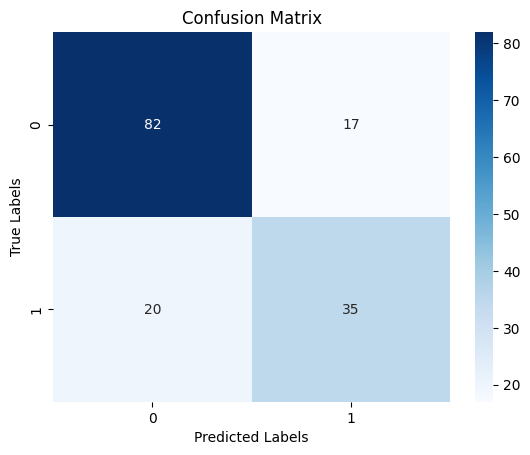

In [260]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

$Classification \space Report$

In [261]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



---
#Model Assessment
---

##$Observations:$

1. Accuracy: The model has a reasonable accuracy of 75.97%, which indicates it’s doing fairly well, but there may still be room for improvement, especially in reducing the number of false positives and false negatives.

2. Precision (67.3%): The precision suggests that when the model predicts the positive class, it is correct 67.3% of the time. This is fairly good but could be improved, especially if false positives are costly in your application.

3. Recall (63.6%): The model is identifying 63.6% of the true positive cases, which means there is a 36.4% rate of false negatives. Depending on the problem, this could be a significant issue if false negatives are undesirable.

4. F1-Score (65.4%): The F1-Score, which balances precision and recall, is moderate, indicating a reasonable trade-off between the two.

###**Confusion Matrix:**

```
[[82 17]
[20 35]]

```
🔍 Key Insights:

True Negatives (TN): 82 → Correctly predicted negatives.

True Positives (TP): 35 → Correctly predicted positives.

False Positives (FP): 17 → Negative cases incorrectly predicted as positive.

False Negatives (FN): 20 → Positive cases incorrectly predicted as negative.

###Interpretation:

  - Good at identifying negatives (high TN).

  - Moderate performance on positives (misses 20 out of 55).

  - Slightly more false negatives than false positives.

Overall, the model performs reasonably well but could benefit from boosting recall.

#$Comparing \space with \space other \space classifiers$

In [264]:
#..............................................................
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd


# Initialize classifiers
#-------------------------------
classifiers = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Create a dictionary to store the results
#--------------------------------------------
results = {}

# Train and evaluate each classifier
#---------------------------------------------
for name, model in classifiers.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extract precision, recall, and f1-score for the positive class (1)
    precision = report['1']['precision']
    recall = report['1']['recall']
    f1_score = report['1']['f1-score']

    # Store results in the dictionary
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1_score
    }

# Print the results
#---------------------------
print("\nClassification Report Summary:")
for classifier, metrics in results.items():
    print(f"{classifier}:")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1-Score: {metrics['F1-Score']:.4f}\n")


Classification Report Summary:
Random Forest:
  Accuracy: 0.7403
  Precision: 0.6316
  Recall: 0.6545
  F1-Score: 0.6429

Logistic Regression:
  Accuracy: 0.7597
  Precision: 0.6731
  Recall: 0.6364
  F1-Score: 0.6542

Decision Tree:
  Accuracy: 0.7013
  Precision: 0.5738
  Recall: 0.6364
  F1-Score: 0.6034

Support Vector Machine:
  Accuracy: 0.7468
  Precision: 0.6667
  Recall: 0.5818
  F1-Score: 0.6214

K-Nearest Neighbors:
  Accuracy: 0.7208
  Precision: 0.5938
  Recall: 0.6909
  F1-Score: 0.6387



# $Overall \space Summary$


---
##Best Model Based on Metric
---


Best Accuracy:  Logistic Regression (0.7597)

Best Precision: Logistic Regression (0.6731)

Best Recall: KNN (0.6909)

Best F1-Score: Logistic Regression (0.6542)

---

##Sample testing and Prediction

In [265]:
# Function to predict diabetes based on input data
def predict_diabetes(input_data):
    # Scale the input data
    scaled_input = scaler.transform([input_data])
    # Make prediction with logistic regression
    # lr_model was never defined, using 'model' instead, assuming
    # it holds the trained LogisticRegression model from the previous cells.
    lr_prediction = model.predict(scaled_input)

    return {"logistic_regression":int(lr_prediction[0])}


# --- Test the function with a new input ---
example_input = [5, 116, 74, 0, 0, 25.6, 0.201, 30]  # New patient data

result = predict_diabetes(example_input)
print(f'With the given data:{example_input},Prediction on diabetes is:', result)

With the given data:[5, 116, 74, 0, 0, 25.6, 0.201, 30],Prediction on diabetes is: {'logistic_regression': 0}
